# Lecture 13 - Trees

## Regression Trees

We use the Boston dataset to predict median house prices

In [2]:
if (!require(MASS)) install.packages("MASS")
if (!require(tree)) install.packages("tree")

library(MASS)
library(tree)

Loading required package: tree

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘tree’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
set.seed(1)
train=sample(1:nrow(Boston),nrow(Boston)/2)
tree.boston=tree(medv~.,Boston,subset=train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

Only three variables have ben used in constructing the tree

lstat is the percentage of individuals with lower income status. Lower values of lstat predict higher valued homes

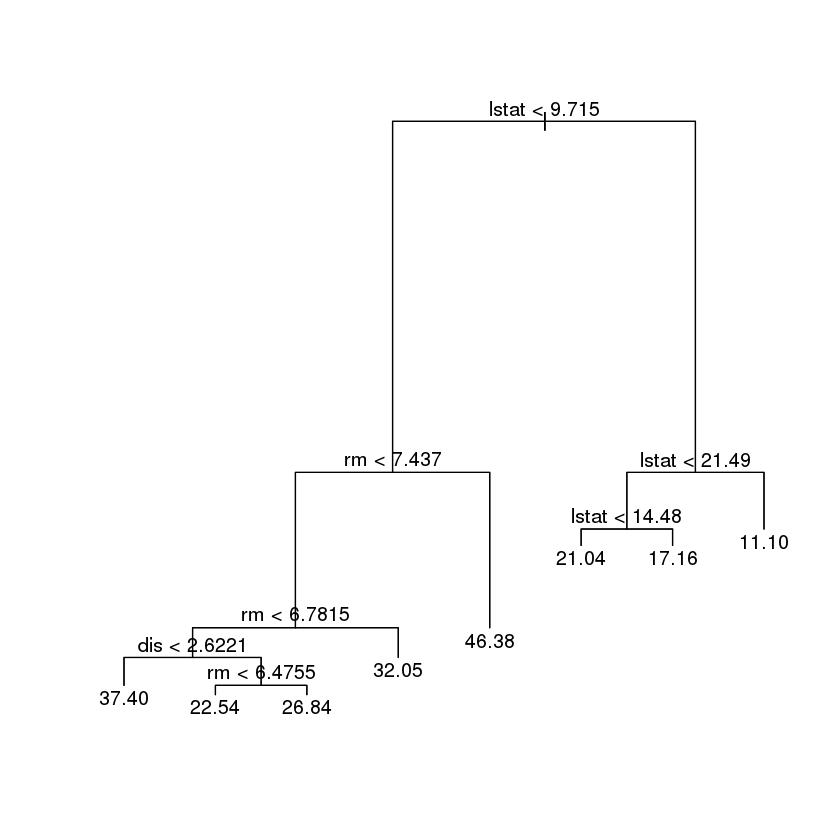

In [ ]:
plot(tree.boston)
text(tree.boston,pretty=0)

Predicts median house price of $46,400 for larger homes (rm>= 7.437) and high socioeconomic status (lstat<9.715)

Now we assess pruning

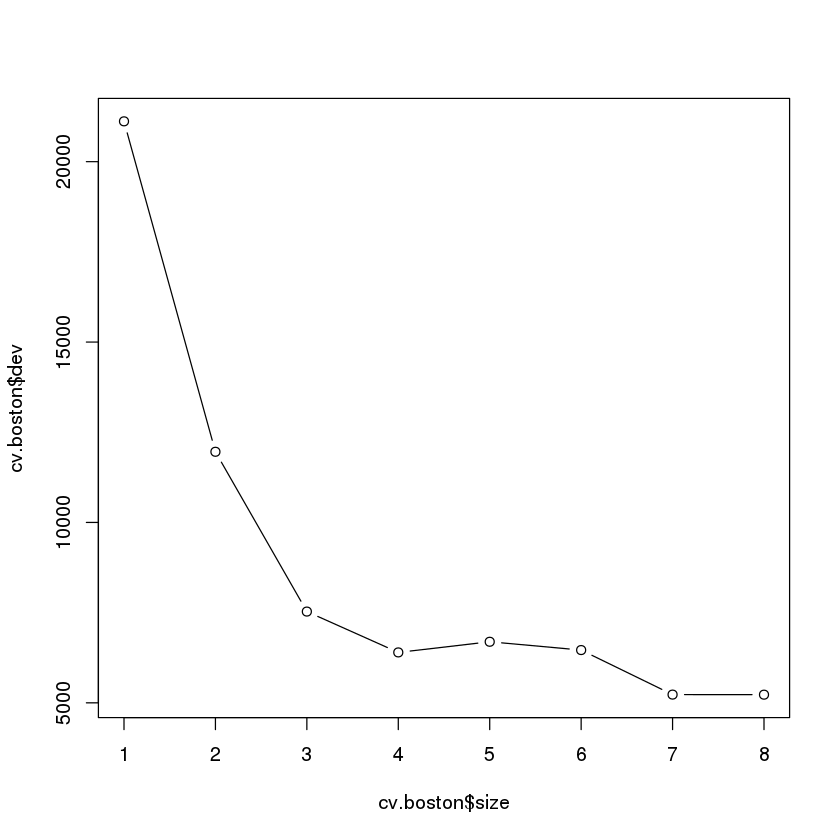

In [ ]:
cv.boston=cv.tree(tree.boston)
plot(cv.boston$size,cv.boston$dev,type="b")

Here, the most complex tree is chosen.

[1] 25.04559

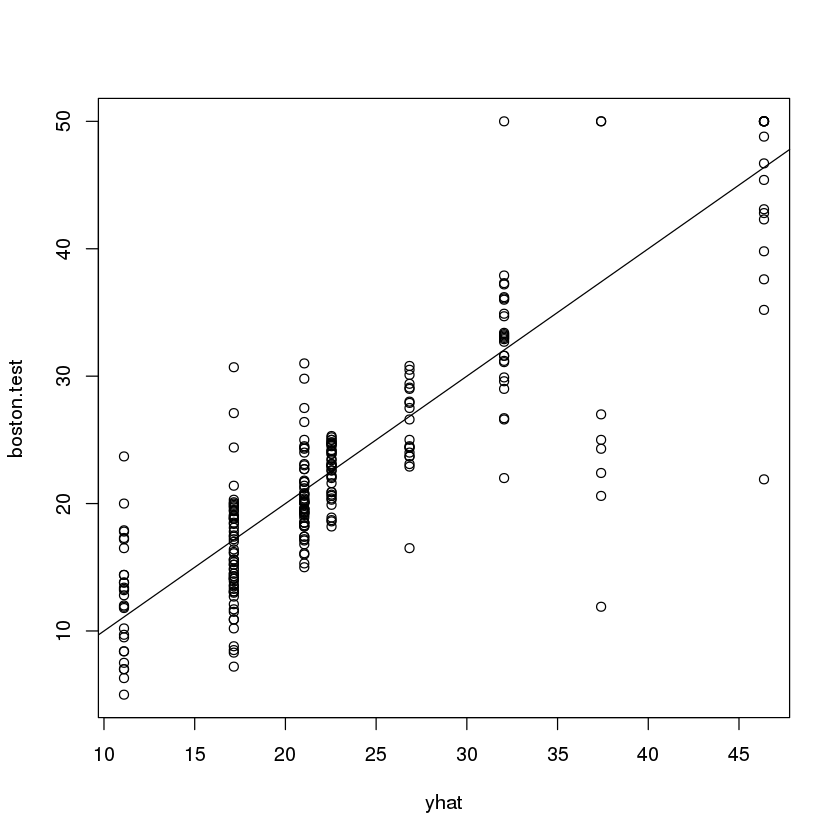

In [ ]:
yhat=predict(tree.boston,newdata=Boston[-train,])
boston.test=Boston[-train,"medv"]
plot(yhat,boston.test)
abline(0,1)
mean((yhat-boston.test)^2) # the test MSE from the regression tree

If we take the square root of the MSE, the model leads to prediction which are within $\sqrt{25.05} = 5.005$ dollars of the median house price for that suburb.

## Bagging and Random Forests